In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Activation, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.models import Model

In [35]:
X = pd.read_csv("/home/vasu/Downloads/fashion-mnist_train.csv").values

y = X[:,0]
X = X[:,1:]
X = X/255.0

X = X.reshape((X.shape[0],28,28,1))

Y = X

print (X.shape,Y.shape)

((60000, 28, 28, 1), (60000, 28, 28, 1))


In [13]:
#encoder

inp = Input(shape=(28,28,1))

c1 = Conv2D(64, (3,3), activation='relu')(inp)
m1 = MaxPooling2D((2,2))(c1)
c2 = Conv2D(32, (3,3), activation='relu')(m1)
m2 = MaxPooling2D((2,2))(c2)
c3 = Conv2D(8, (3,3), activation='relu')(m2)
f1 = Flatten()(c3)
d2 = Dense(2, activation='relu')(f1)

# decoder

d3 = Dense(72, activation='relu')(d2)
r1 = Reshape((3,3,8))(d3)
zp1 = ZeroPadding2D((1,1))(r1)
c4 = Conv2D(32, (3,3), activation='relu', padding='same')(zp1)
up1 = UpSampling2D((2,2))(c4)
zp2 = ZeroPadding2D((2,2))(up1)
c5 = Conv2D(64, (3,3), activation='relu', padding='same')(zp2)
up2 = UpSampling2D((2,2))(c5)
c6 = Conv2D(1, (3,3), activation='relu', padding='same')(up2)

model = Model(inputs=inp,outputs=c6)
encoder = Model(inputs=inp, outputs=d2)
act_map = Model(inputs=inp,outputs=c5)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 8)           2312      
_________________________________________________________________
flatten_6 (Flatten)          (None, 72)                0         
__________

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [15]:
hist = model.fit(X,Y,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0738 - acc: 0.4919 - val_loss: 0.0646 - val_acc: 0.4902
Epoch 2/20
48000/48000 [==============================] - 74s 2ms/step - loss: 0.0628 - acc: 0.4917 - val_loss: 0.0589 - val_acc: 0.4932
Epoch 3/20
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0455 - acc: 0.4954 - val_loss: 0.0413 - val_acc: 0.4954
Epoch 4/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0399 - acc: 0.4966 - val_loss: 0.0391 - val_acc: 0.4963
Epoch 5/20
48000/48000 [==============================] - 76s 2ms/step - loss: 0.0383 - acc: 0.4970 - val_loss: 0.0382 - val_acc: 0.4958
Epoch 6/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0373 - acc: 0.4973 - val_loss: 0.0372 - val_acc: 0.4973
Epoch 7/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0366 - acc: 0.4975 - val_loss: 0.0367 - val_acc

In [16]:
## acivation map

out_conv = act_map.predict(X)

print out_conv.shape

(60000, 14, 14, 64)


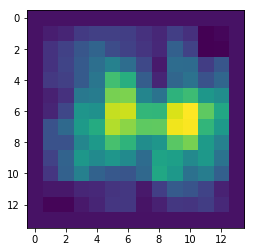

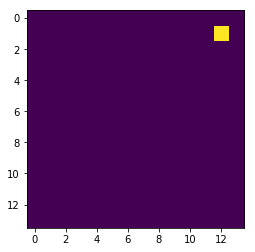

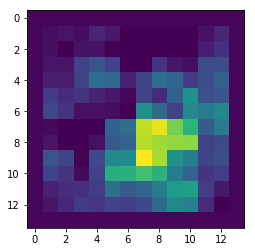

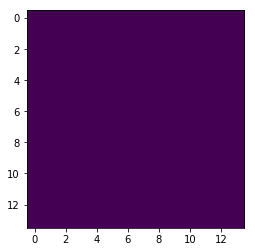

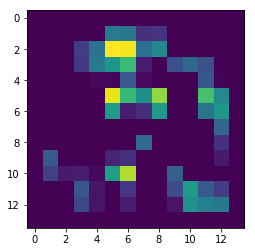

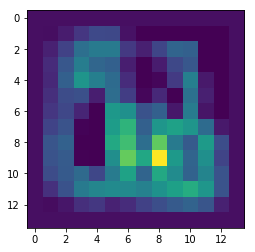

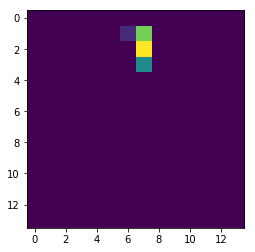

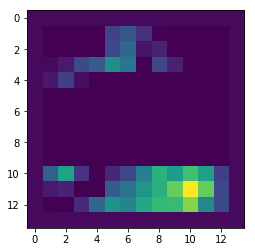

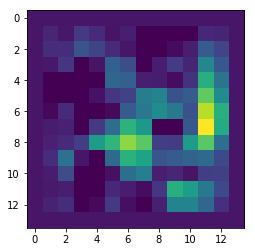

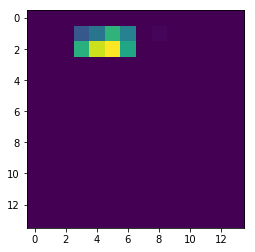

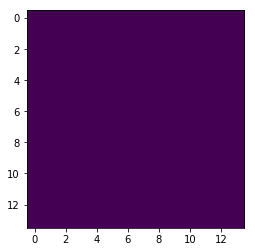

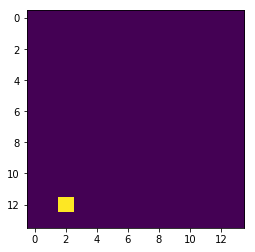

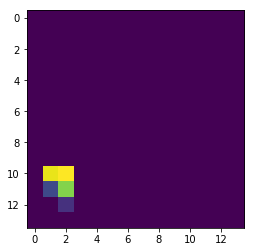

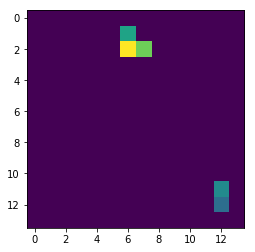

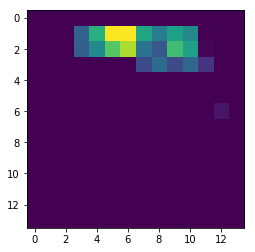

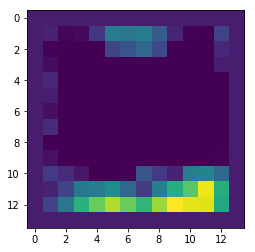

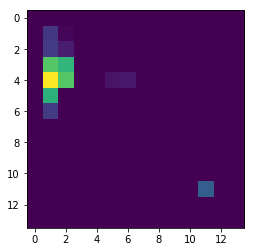

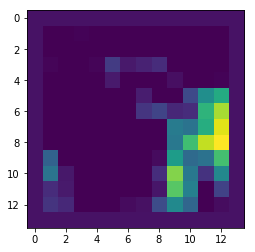

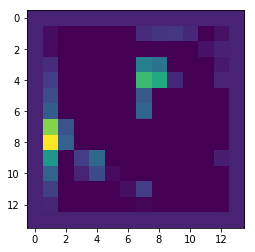

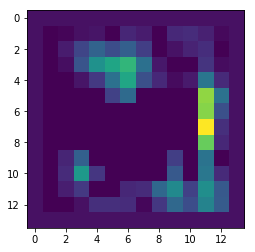

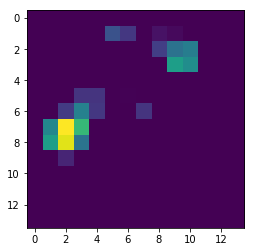

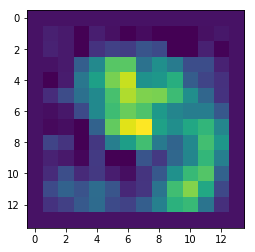

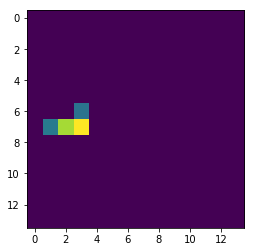

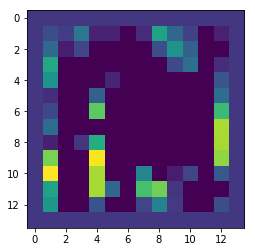

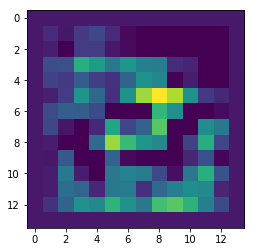

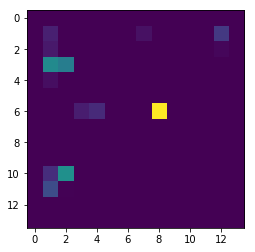

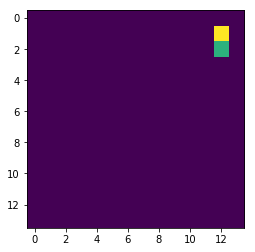

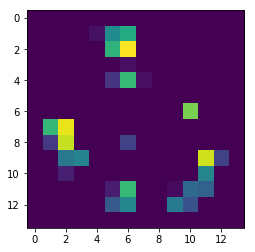

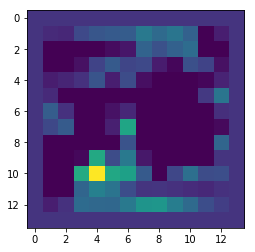

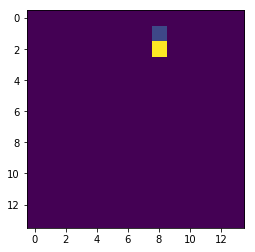

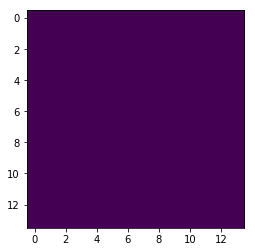

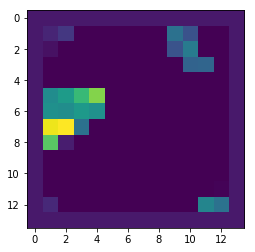

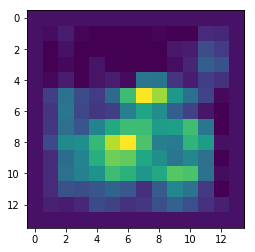

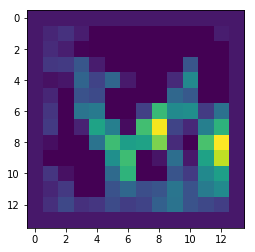

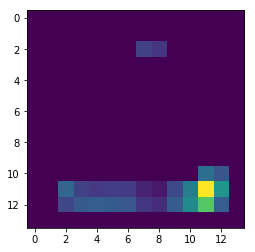

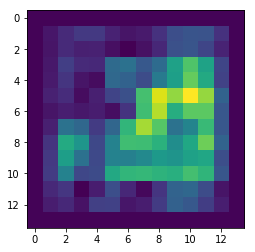

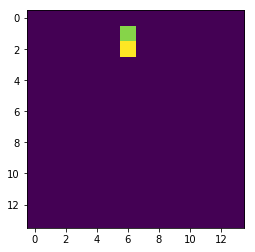

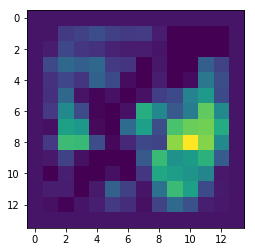

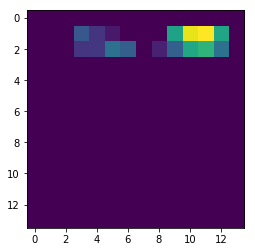

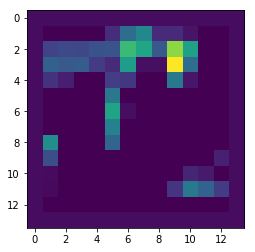

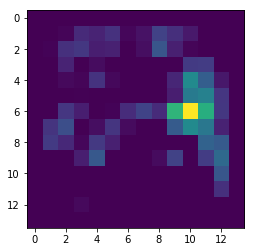

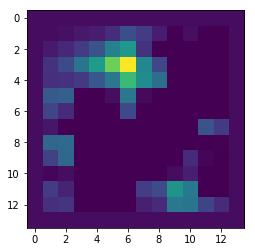

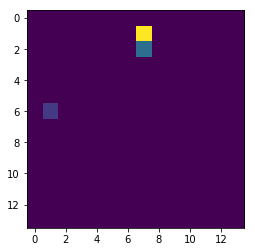

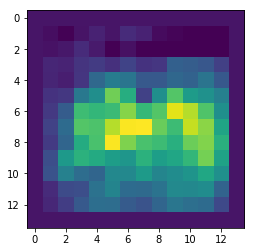

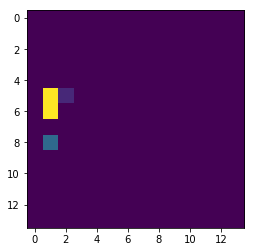

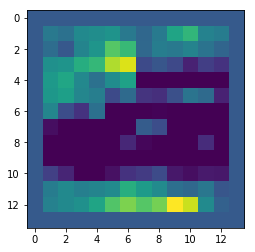

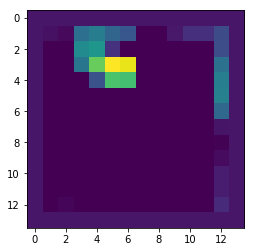

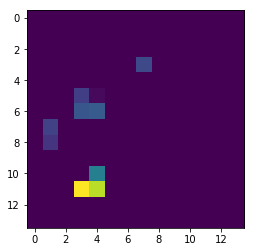

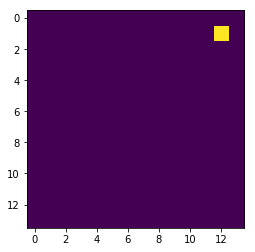

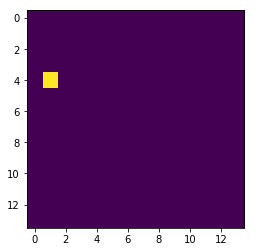

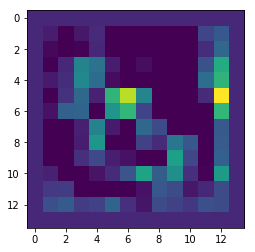

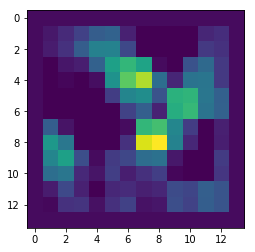

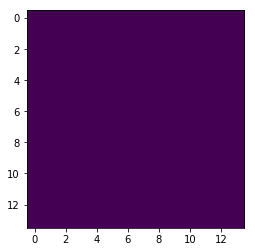

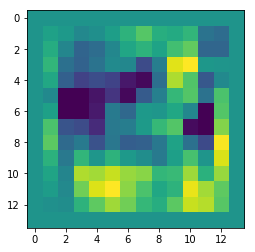

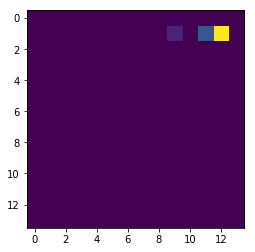

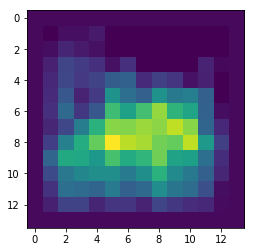

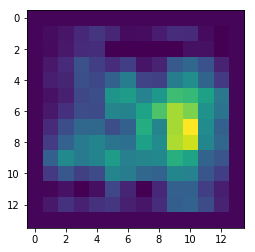

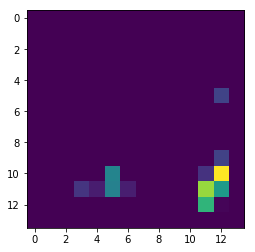

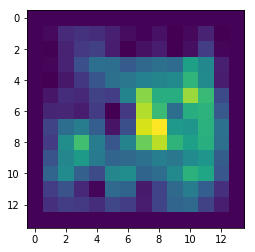

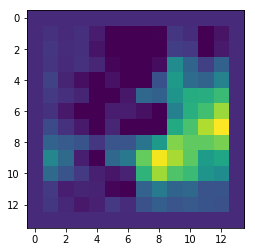

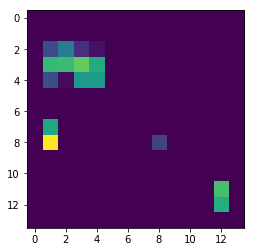

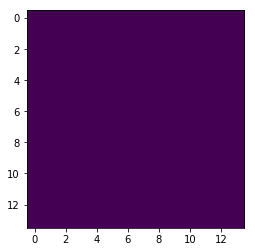

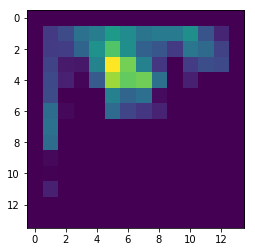

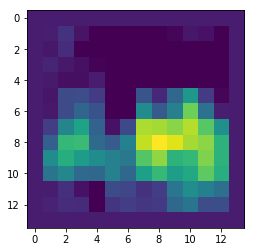

In [24]:
for ix in range(64):
    plt.imshow(out_conv[1][:,:,ix])
    plt.show()

In [29]:
# reconstrction

recon = model.predict(X[:10]).reshape(10,28,28)

print recon.shape

(10, 28, 28)


In [28]:
X_in = X[:10].reshape(10,28,28)

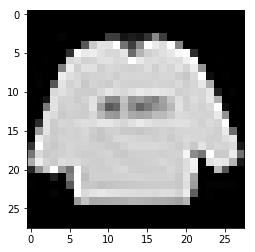

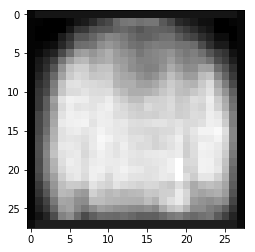

####################


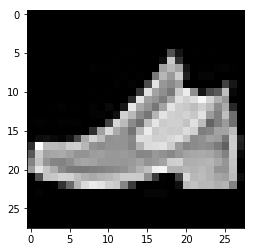

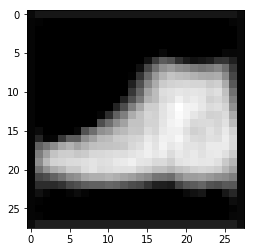

####################


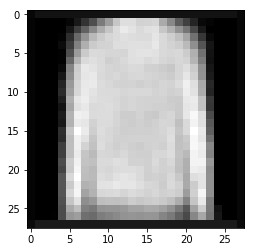

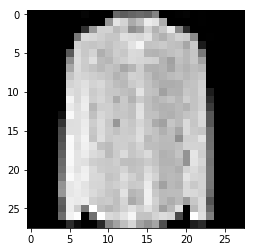

####################


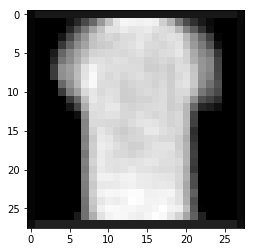

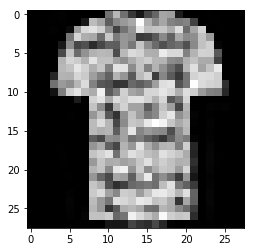

####################


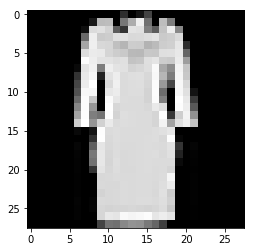

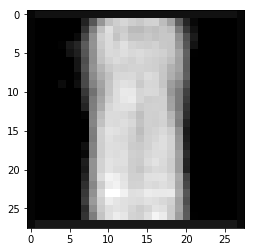

####################


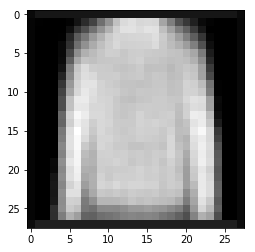

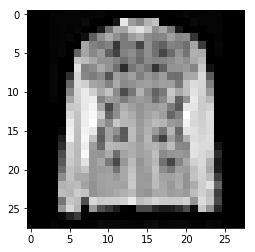

####################


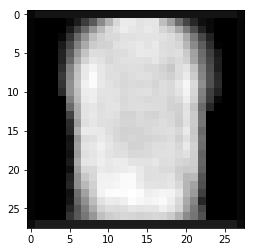

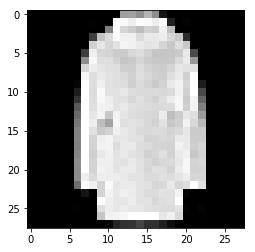

####################


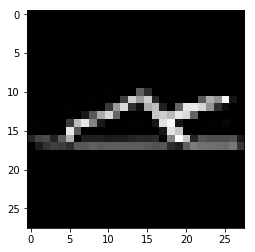

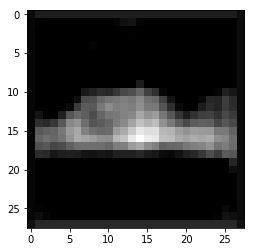

####################


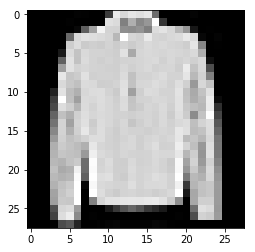

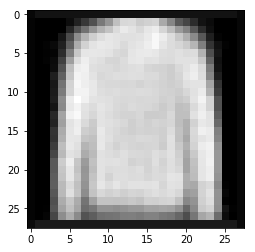

####################


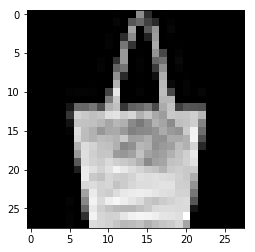

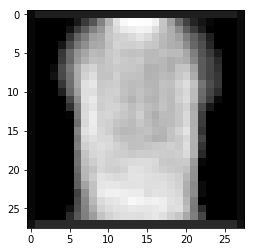

####################


In [32]:
for ix in range(10):
    plt.figure(ix+1)
    plt.imshow(X_in[ix],cmap='gray')
    plt.figure(3*(ix+1))
    plt.imshow(recon[ix],cmap='gray')
    plt.show()
    print (20*'#')

## Autoencoders

In [33]:
# 2 dimensions

out2d = encoder.predict(X)

print (out2d.shape)

(60000, 2)


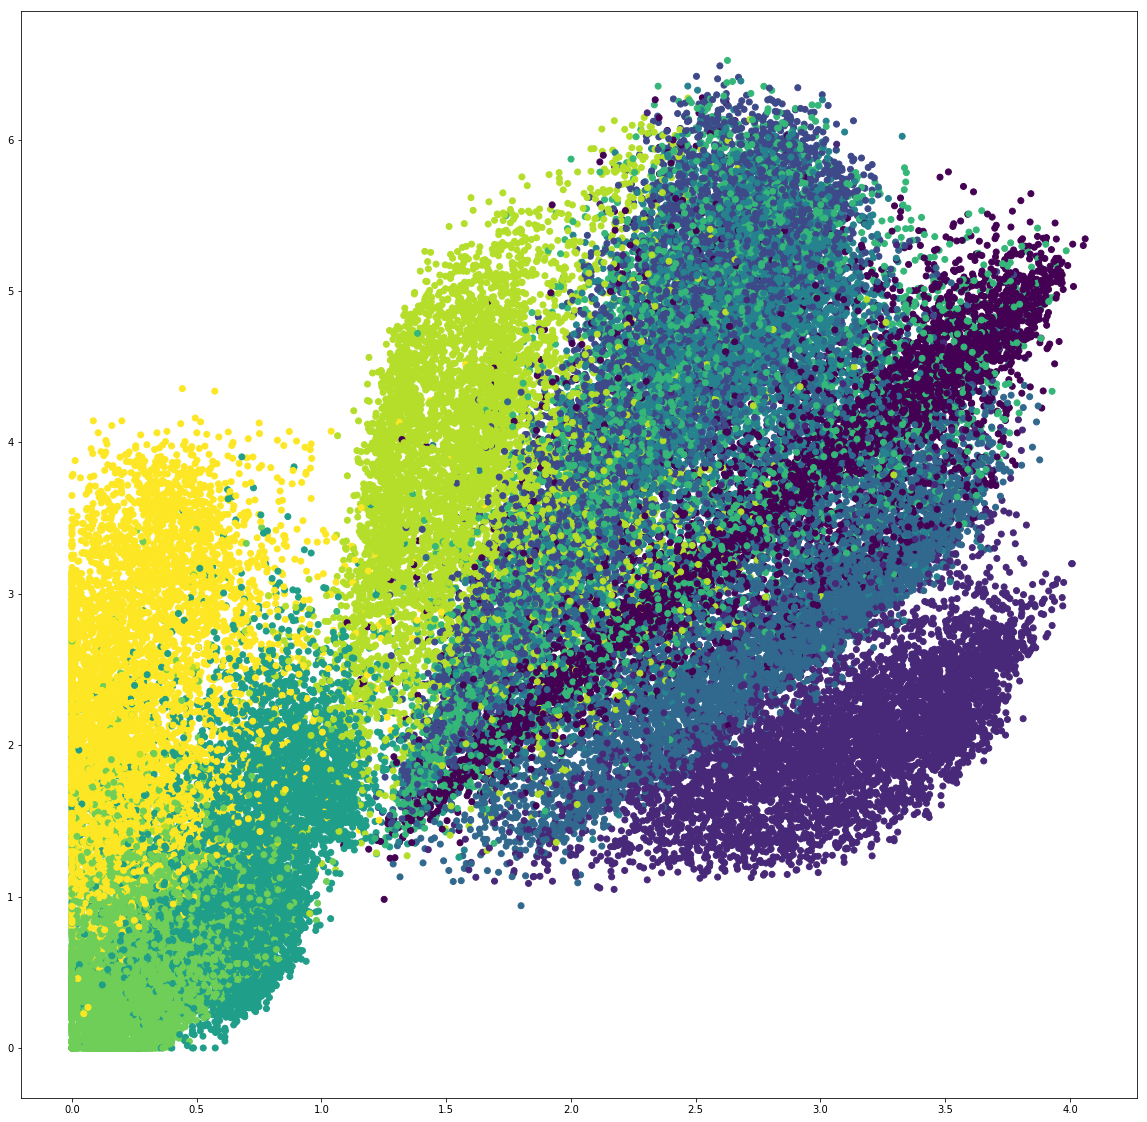

In [37]:
plt.figure(figsize=(20,20))
plt.scatter(out2d[10000,0],out2d[:,1],c=y)
plt.show()

In [45]:
test = pd.read_csv("/home/vasu/Downloads/fashion-mnist_test.csv").values

x = test[:,1:]
x = x/255.0
x_ = x.reshape(x.shape[0],28,28,1)
y = test[:,0]

In [46]:
test2d = encoder.predict(x_)

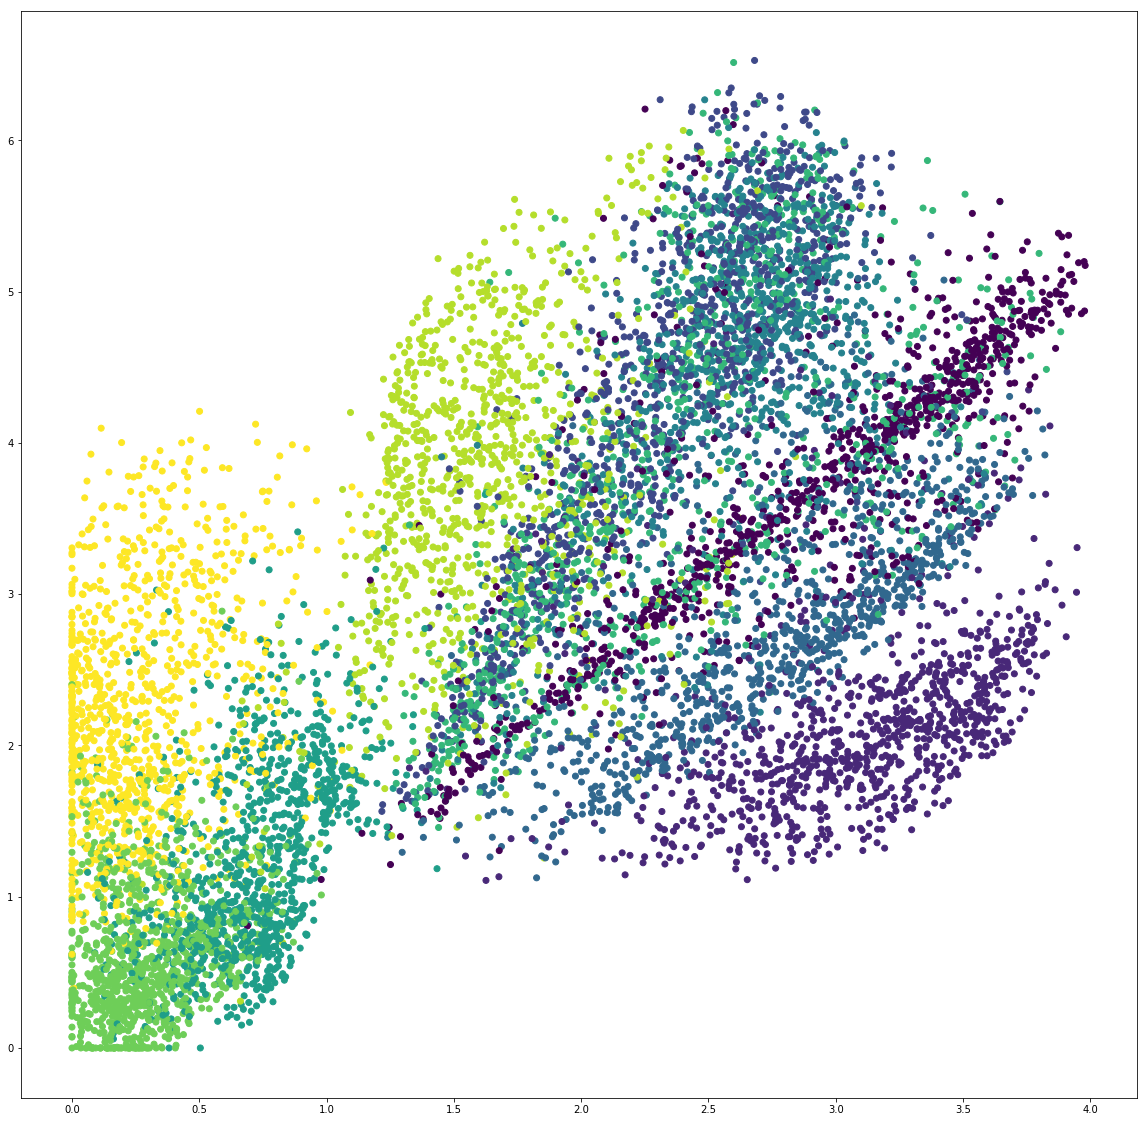

In [47]:
plt.figure(figsize=(20,20))
plt.scatter(test2d[:,0],test2d[:,1],c=y)
plt.show()

## PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)

In [48]:
out2dp = pca.fit_transform(x)

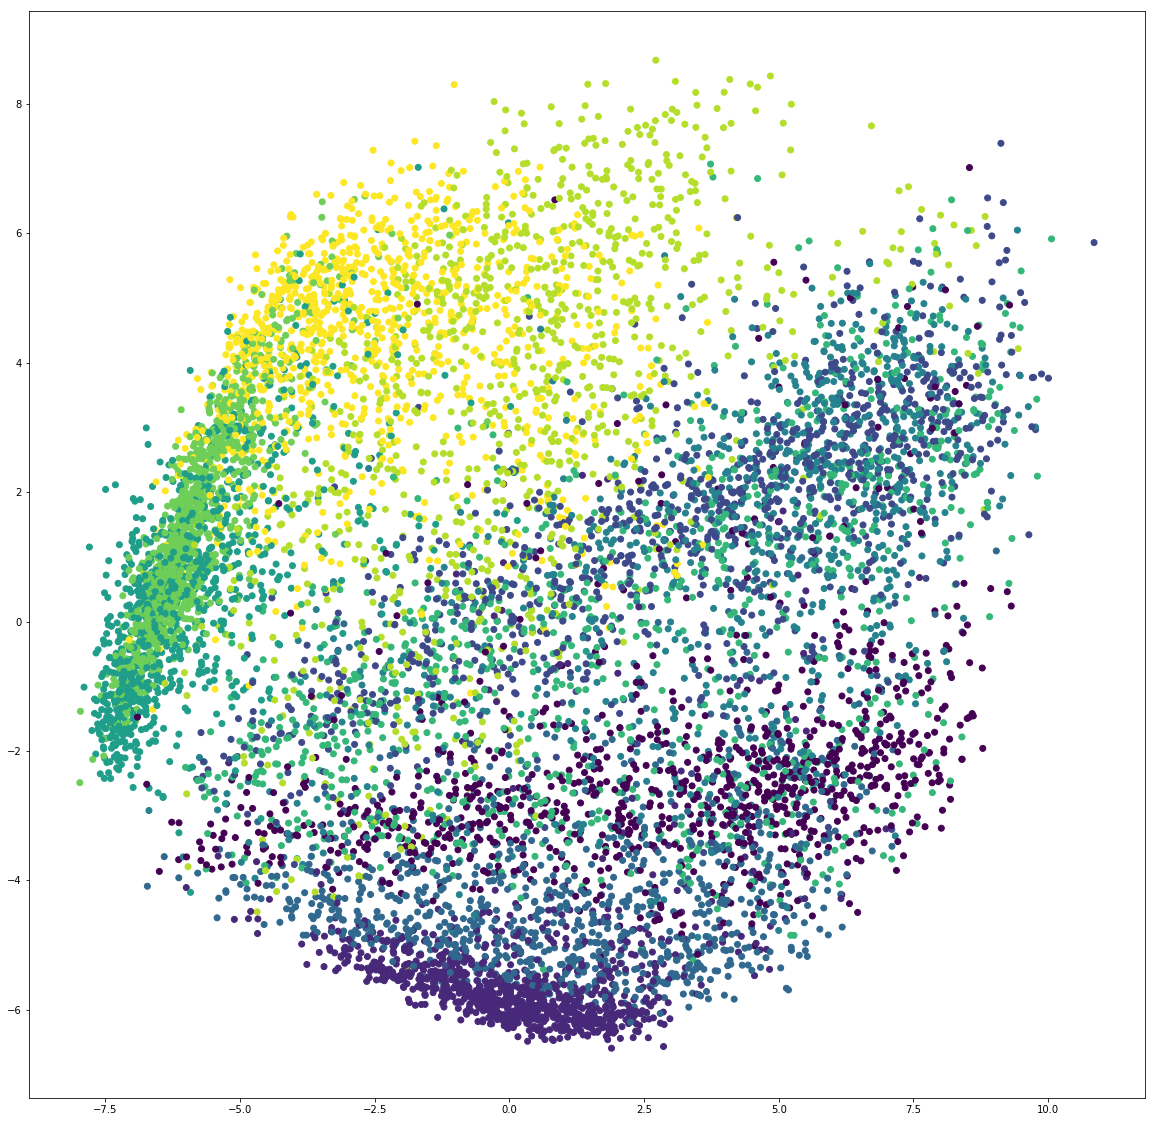

In [50]:
plt.figure(figsize=(20,20))
plt.scatter(out2dp[:,0],out2dp[:,1],c=y)
plt.show()

## t-SNE

In [53]:
from sklearn.manifold.t_sne import TSNE

In [55]:
tsne = TSNE(n_components=2)

In [56]:
out2dt = tsne.fit_transform(x)

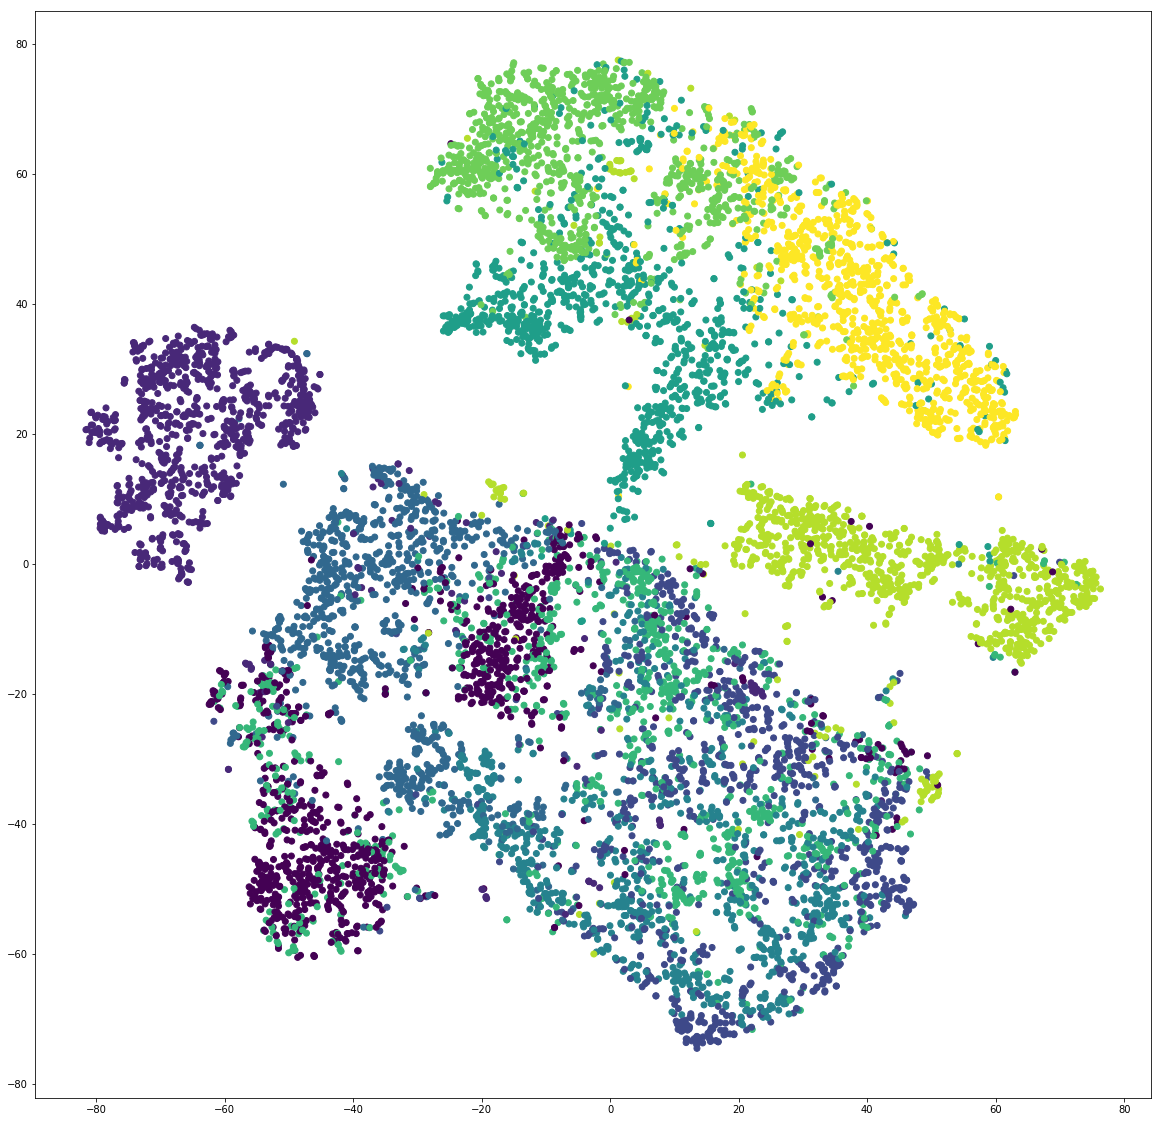

In [57]:
plt.figure(figsize=(20,20))
plt.scatter(out2dt[:,0],out2dt[:,1],c=y)
plt.show()